Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

[ 3.99951172] [[ -9.99707031e-01  -2.92968750e-04]]
margin =  2.00058602331
Support vectors:  [4 5 3]
Dual coefs:  [[ -4.99707031e-01  -1.46484375e-04   4.99853516e-01]]


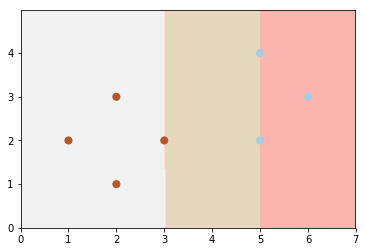

In [2]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

# Vaš kôd ovdje...
svc = SVC (C=1.0, kernel="linear")
svc.fit(seven_X, seven_y)
print svc.intercept_,svc.coef_
print "margin = ", 2/sp.linalg.norm(svc.coef_)
print "Support vectors: ", svc.support_
print "Dual coefs: ", svc.dual_coef_
mlutils.plot_2d_svc_problem(seven_X, seven_y, svc=svc)

**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [3]:
from sklearn.metrics import hinge_loss

# Vaš kôd ovdje...
Xes = np.array([[3.5,2], [3,2], [4,2]])
Ys = np.array([1,1,-1])

def hinge(model, x, y):
    h  = model.decision_function(x)
    hinge = max(0,1 -y*h)
    return hinge

for x,y in zip(Xes,Ys):
    print "Hinge for ", x, "->", y , " : ", hinge(svc, x, y)
    
print hinge_loss(seven_y, svc.decision_function(seven_X))

avg_seven = 0
for i in range(0,7):
    avg_seven += hinge(svc, [seven_X[i]], [seven_y[i]])
avg_seven /= 7.0
print avg_seven

Hinge for  [ 3.5  2. ] -> 1  :  [ 0.50004883]
Hinge for  [ 3.  2.] -> 1  :  [ 0.00019531]
Hinge for  [ 4.  2.] -> -1  :  [ 1.00009766]
8.37053571429e-05
[  8.37053571e-05]


C:\Users\dreyus95\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\dreyus95\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\dreyus95\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprec

#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [4]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

margin =  2.0
Outlier accuracy:  1.0


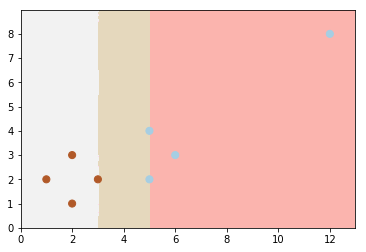

margin =  3.00074934316
unsep accuracy:  0.875


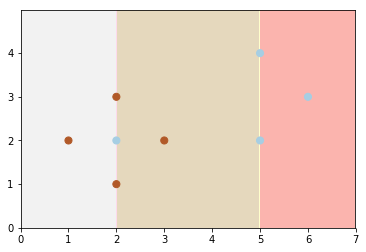

In [5]:
# Vaš kôd ovdje...
svc.fit(outlier_X, outlier_y)
print "margin = ", 2/sp.linalg.norm(svc.coef_)
print "Outlier accuracy: ",accuracy_score(outlier_y,svc.predict(outlier_X))

mlutils.plot_2d_svc_problem(outlier_X, outlier_y, svc=svc)
plt.show()

svc.fit(unsep_X, unsep_y)
print "margin = ", 2/sp.linalg.norm(svc.coef_)
print "unsep accuracy: ",accuracy_score(unsep_y,svc.predict(unsep_X))
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc=svc)

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

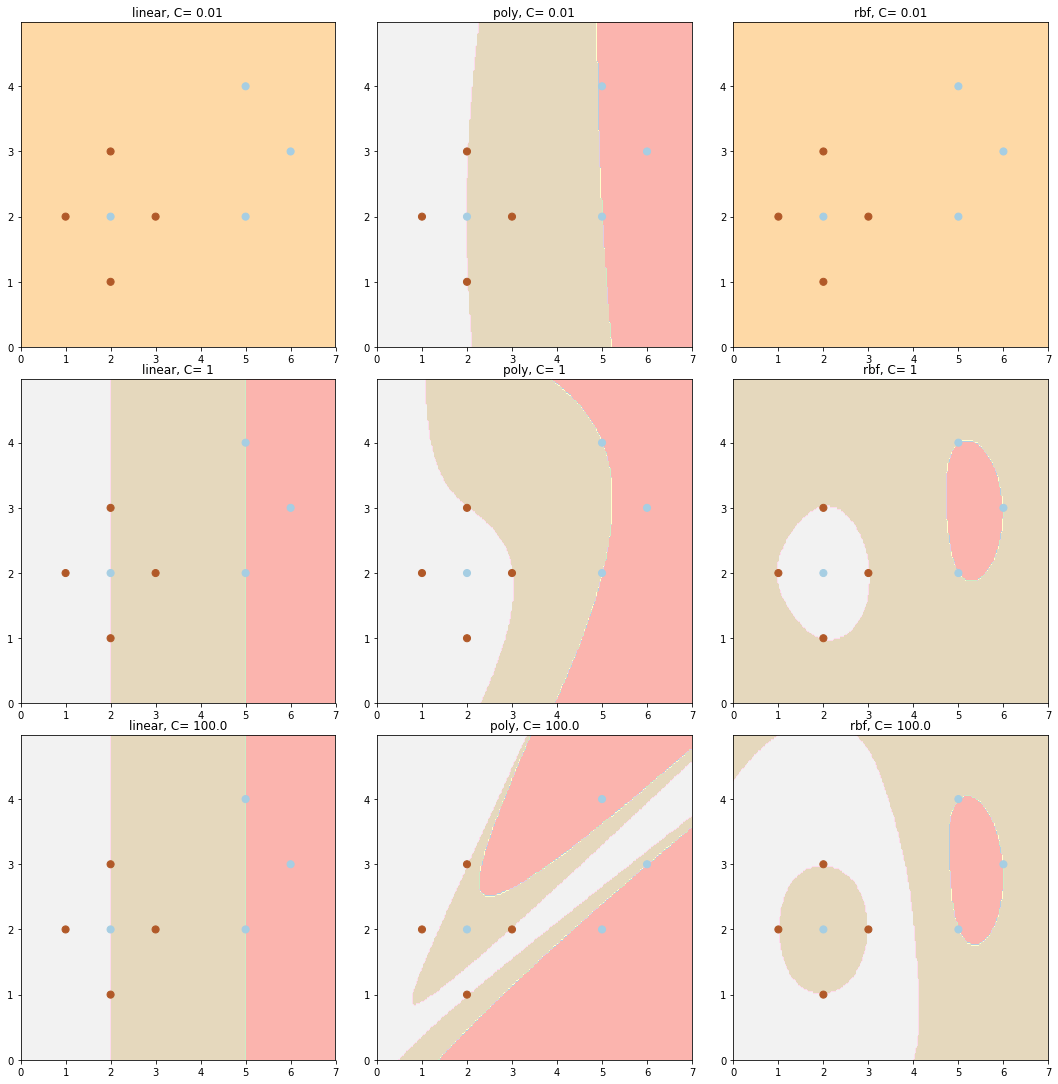

In [6]:
# Vaš kôd ovdje...
fig, axarr = plt.subplots(3, 3, figsize = (15, 15))
fig.tight_layout()

Cs = [1e-2, 1, 1e2]
kernels = ["linear", "poly", "rbf"]

for C,i in zip(Cs,[0,1,2]):
    for kernel,j in zip(kernels,[0,1,2]):
        svc = SVC (C=C, kernel=kernel)
        svc.fit(unsep_X, unsep_y)
        axarr[i, j].set_title(kernel + ", C= " + str(C))
        plt.axes(axarr[i, j])
        mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc=svc)
        
        

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [7]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1, c2), (g1, g2), error_surface=False) :
    # Vaš kôd ovdje...

    cs = []
    gs = []
    acc_best = -9999
    start = c1
    while start<c2:
        start += 1
        cs.append(2**start)

    start = g1
    while start<g2:
        start += 1
        gs.append(2**start) 

    zero_one_loss_train = [[0 for i in range(g2-g1)] for j in range(c2-c1)] 
    zero_one_loss_validate = [[0 for i in range(g2-g1)] for j in range(c2-c1)] 
    
    i=0
    j = 0
    for c in cs:
        j = 0
        for g in gs:
            svc = SVC(C=c, gamma=g)
            svc.fit(X_train, y_train)
            h = svc.predict(X_validate)
            acc = accuracy_score(y_validate, h)
            if( acc > acc_best):    
                c_best = c
                g_best = g
                acc_best = acc
            zero_one_loss_train[i][j] = zero_one_loss(y_train, svc.predict(X_train))
            zero_one_loss_validate[i][j] = zero_one_loss(y_validate, svc.predict(X_validate))
            j += 1
        i += 1
            
    if(error_surface):
        return c_best, g_best, np.array(zero_one_loss_train), np.array(zero_one_loss_validate)
    else:
        return c_best, g_best

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

C:\Users\dreyus95\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C1_best:  1
G1_best:  8


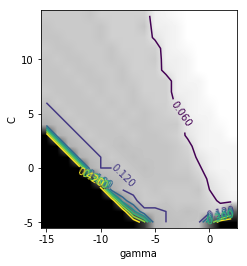

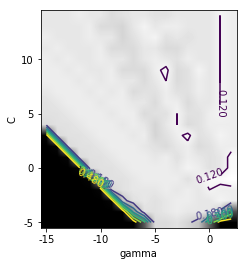

C2_best:  0.0625
G2_best:  0.0001220703125


NameError: name 'r' is not defined

In [8]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

X1, y1 = make_classification(n_samples=200, n_classes=2,n_features=2, n_informative=2,n_redundant=0, n_clusters_per_class=2)
X2, y2 = make_classification(n_samples=200, n_classes=2, n_features=1000, n_informative=1000,n_redundant=0, n_clusters_per_class=2)  

X1_train, X1_validate, y1_train, y1_validate = train_test_split(X1, y1, test_size=0.5)
X2_train, X2_validate, y2_train, y2_validate = train_test_split(X2, y2, test_size=0.5)


c1, g1, zo_loss_train1, zo_loss_test1 = grid_search(X1_train, X1_validate, y1_train, y1_validate, (-5, 15), (-15, 3), error_surface=True)
print "C1_best: ",c1
print "G1_best: ",g1

mlutils.plot_error_surface(zo_loss_train1,(-5, 15), (-15, 3))
plt.show()
mlutils.plot_error_surface(zo_loss_test1, (-5, 15), (-15, 3))
plt.show()


c2, g2, zo_loss_train2, zo_loss_test2 = grid_search(X2_train, X2_validate, y2_train, y2_validate, (-5, 15), (-15, 3), error_surface=True)

print "C2_best: ",c2
print "G2_best: ",g2

mlutils.plot_error_surface(r, (-5, 15), (-15, 3))
plt.show()
mlutils.plot_error_surface(zo_loss_test2, (-5, 15), (-15, 3))
plt.show()


**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

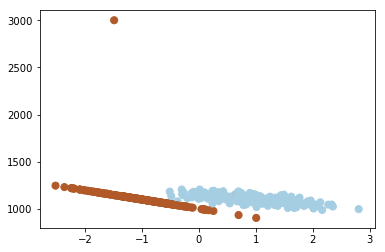

In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000

mlutils.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

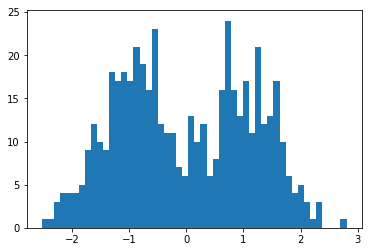

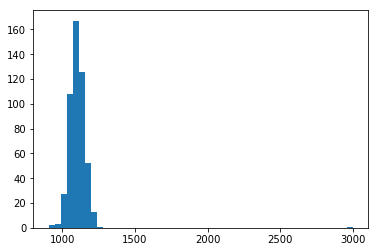

In [11]:
# Vaš kôd ovdje...
plt.hist(X[:, 0], bins=50)
plt.show()
plt.hist(X[:, 1], bins=50)
plt.show()

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

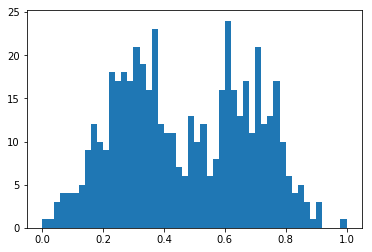

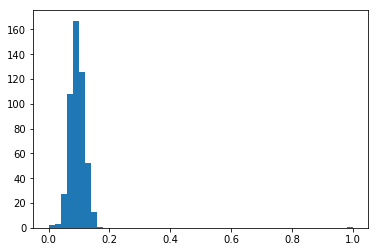

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Vaš kôd ovdje...

mmSc = MinMaxScaler(feature_range=(0, 1))
X_scale = mmSc.fit_transform(X, y)
plt.hist(X_scale[:, 0], bins=50)
plt.show()
plt.hist(X_scale[:, 1], bins=50)
plt.show()

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

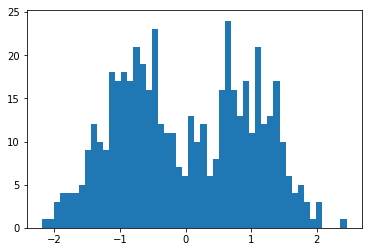

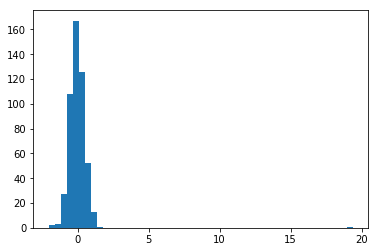

In [13]:
from sklearn.preprocessing import StandardScaler

# Vaš kôd ovdje...
sSc = StandardScaler()
X_scale = sSc.fit_transform(X, y)
plt.hist(X_scale[:, 0], bins=50)
plt.show()
plt.hist(X_scale[:, 1], bins=50)
plt.show()

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [14]:
# Vaš kôd ovdje...
import sklearn
accuracy_train = [[] for i in range(3)]
accuracy_test = [[] for i in range(3)]


for i in range(30):

    X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
    X[:,1] = X[:,1]*100+1000
    X[0,1] = 3000
    X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.5)
    
    svc = SVC(kernel="rbf")
    
    svc.fit(X_train, y_train)
    accuracy_train[0].append(accuracy_score(y_train, svc.predict(X_train)))
    accuracy_test[0].append(accuracy_score(y_test, svc.predict(X_test)))
    
    
    mmSc = MinMaxScaler(feature_range=(0, 1))
    X_scale_train = mmSc.fit_transform(X_train, y_train)
    X_scale_test = mmSc.transform(X_test)
    accuracy_train[1].append(accuracy_score(y_train, svc.predict(X_scale_train)))
    accuracy_test[1].append(accuracy_score(y_test, svc.predict(X_scale_test)))
    
    sSc = StandardScaler()
    X_scale_train = sSc.fit_transform(X_train, y_train)
    X_scale_test = sSc.transform(X_test)
    accuracy_train[2].append(accuracy_score(y_train, svc.predict(X_scale_train)))
    accuracy_test[2].append(accuracy_score(y_test, svc.predict(X_scale_test)))
    
print "Unscaled train avg : ", sum(accuracy_train[0])/float(len(accuracy_train[0]))
print "StandardScale train avg: ", sum(accuracy_train[1])/float(len(accuracy_train[1]))
print "MinmaxScale train avg: ", sum(accuracy_train[2])/float(len(accuracy_train[2]))


print "\nUnscaled test avg: ",sum(accuracy_test[0])/float(len(accuracy_test[0]))
print "StandardScale test avg: ",sum(accuracy_test[1])/float(len(accuracy_test[1]))
print "MinmaxScale test avg: ",sum(accuracy_test[2])/float(len(accuracy_test[2]))

Unscaled train avg :  0.986666666667
StandardScale train avg:  0.508
MinmaxScale train avg:  0.508

Unscaled test avg:  0.8244
StandardScale test avg:  0.489066666667
MinmaxScale test avg:  0.489066666667


**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [15]:
from scipy.linalg import norm
from bisect import insort
import collections

class KNN:
    def __init__(self, n_neighbors=3):
        # Vaš kôd ovdje...
        self.n_neighbors = n_neighbors
        
    def fit(self, X_train, y_train):
        # Vaš kôd ovdje...
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        # Vaš kôd ovdje...
        predictions = []
        for x in X_test:
            nearest_neighbors = self.getNeighbors(x)
            
            prediction = self.getPrediction(x, nearest_neighbors)
            np.append(self.X_train, x)
            np.append(self.y_train, prediction)
            predictions.append(prediction)
            
        return predictions
    
    def getNeighbors(self,x):
        neighbors = dict()
        i = 0
        
        for sample in self.X_train:
            neighbors[norm(x - sample, axis=0)] = i
            i += 1
        od  = collections.OrderedDict(sorted(neighbors.items()))
        
        od_values = od.values()
        nearest_neighbors = []
        
        for k in range(self.n_neighbors):
            nearest_neighbors.append(od_values[k])
            
        return nearest_neighbors
    
    def getPrediction(self, x, indices):
        positives = 0
        negatives = 0
        for index in indices:
            if(self.y_train[index] == 1):
                positives += 1
            else:
                negatives += 1
        
        if( positives >= negatives):
            return 1
        else:
            return 0

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

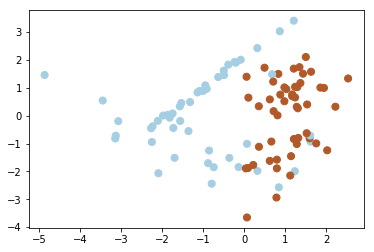

In [16]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X_art, y_art)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Vaš kôd ovdje...

my_knn = KNN()
my_knn.fit(X_art, y_art)
predictions = my_knn.predict([[-4, 3], [0, 2], [-3, -1]])
print predictions

knn = KNeighborsClassifier()
knn.fit(X_art, y_art)
predictions2 = knn.predict([[-4, 3], [0, 2], [-3, -1]])
print predictions2

[0, 0, 0]
[0 0 0]


#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

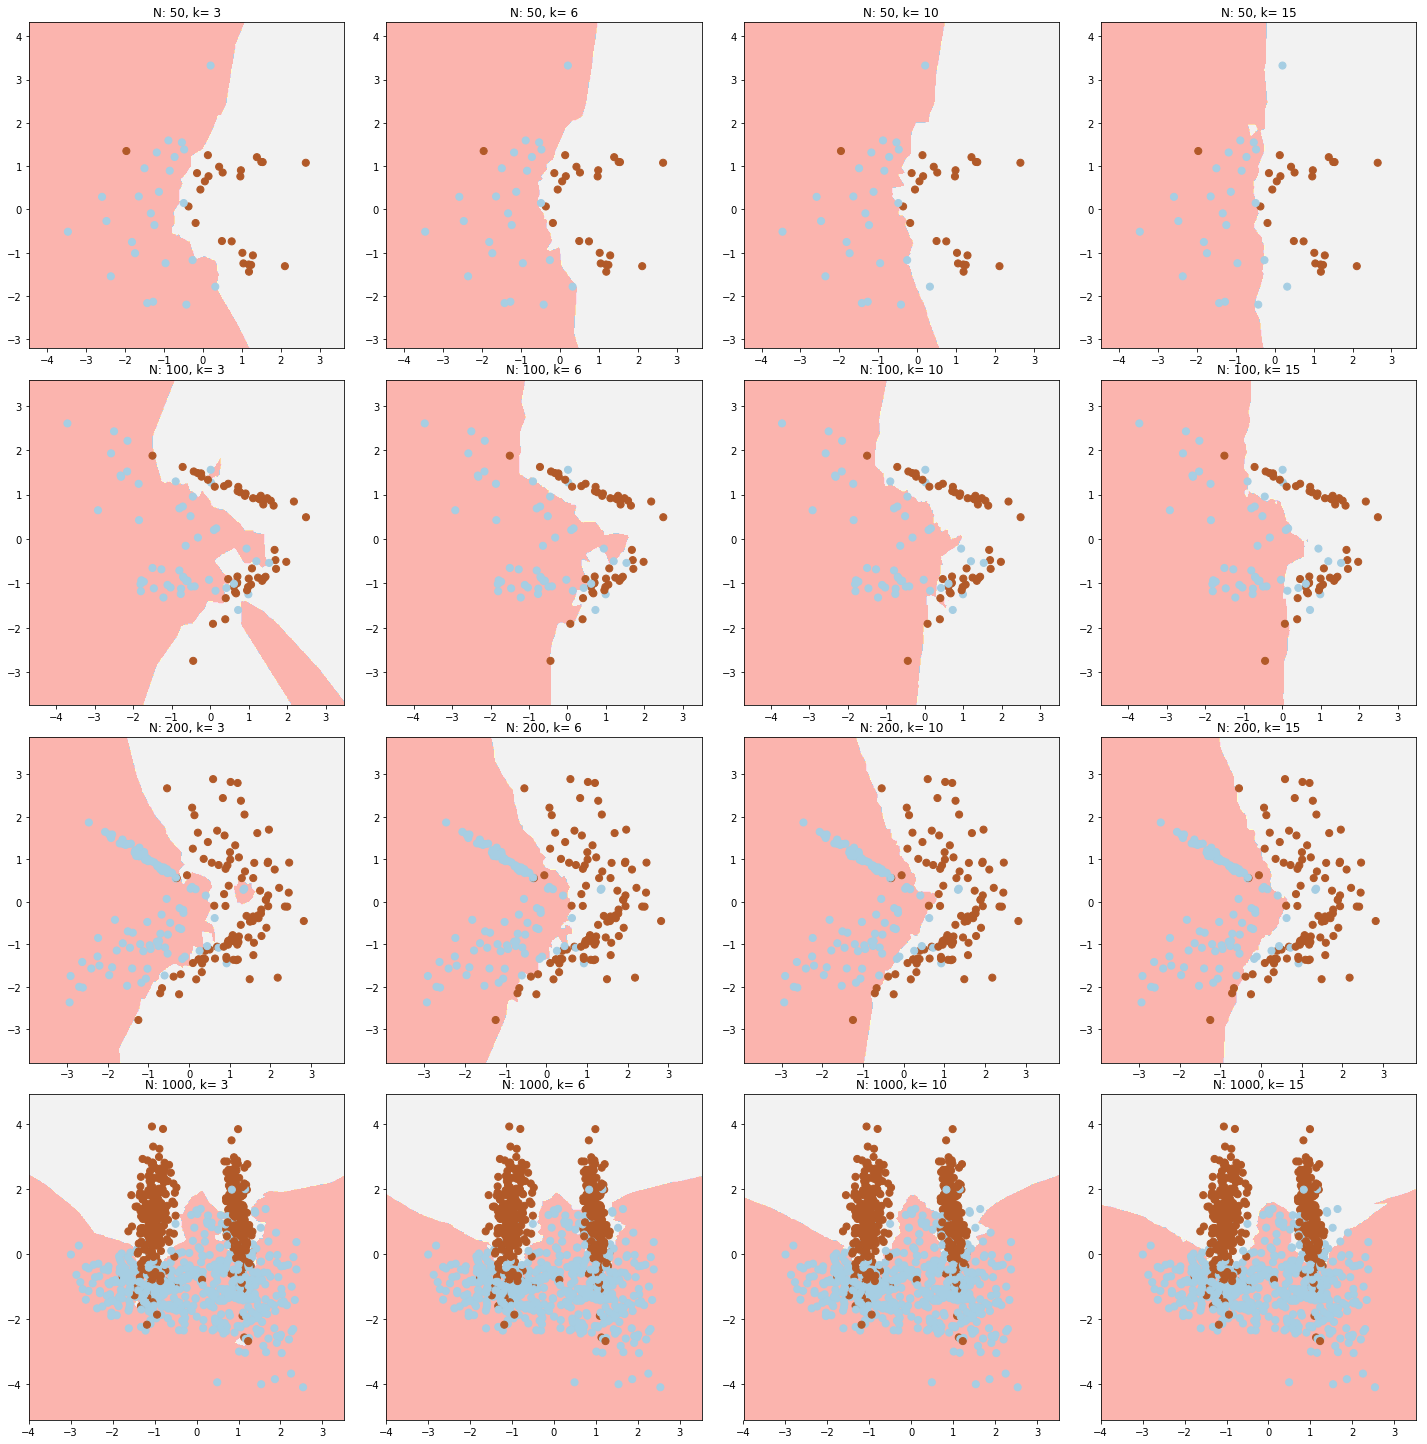

In [18]:
# Vaš kôd ovdje...
figure, axarr = plt.subplots(4, 4, figsize = (20, 20))
figure.tight_layout()

i = 0
for N in (50,100,200, 1000):
    X_art, y_art = make_classification(n_samples=N, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
    j = 0
    for k in (3, 6, 10, 15):
        knc = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        knc.fit(X_art, y_art) 
        plt.axes(axarr[i, j])
        axarr[i, j].set_title("N: "+ str(N) + ", k= " + str(k))
        mlutils.plot_2d_clf_problem(X_art,y_art,knc.predict)
        j += 1
    i += 1

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [19]:
from sklearn.cross_validation import train_test_split

def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    train_errors = []
    test_errors = []
    best_k = 1
    best_test_error = 1
    for k in range(k_range[0], k_range[1]+1):
        
        train_iteration = []
        test_iteration = []
        
        for trial in range(n_trials):
            X_art, y_art = make_classification(n_samples=n_instances, n_redundant=0, n_features=n_features, n_classes=n_classes, n_informative=n_informative,n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X_art, y_art, test_size=test_size)
            knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
            knn.fit(X_train, y_train)
            train_iteration.append(zero_one_loss(y_train, knn.predict(X_train)))
            test_iteration.append(zero_one_loss(y_test, knn.predict(X_test)))
        
        train_error_avg = sum(train_iteration) / float(len(train_iteration))
        test_error_avg = sum(test_iteration) / float(len(test_iteration))
        
        if(test_error_avg < best_test_error):
            best_test_error = test_error_avg
            best_k = k
            
        train_errors.append(train_error_avg)
        test_errors.append(test_error_avg)
    
    return (best_k, train_errors, test_errors)

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

Best k:  5


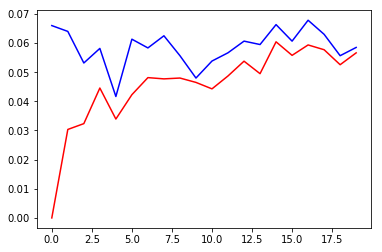

In [22]:
# Vaš kôd ovdje...
N = 200
k, train_errors, test_errors = knn_eval(n_instances=N)
print "Best k: ",k
plt.plot(range(len(train_errors)), train_errors, color = "red")
plt.plot(range(len(test_errors)), test_errors, color = "blue")
plt.show()

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

Trying with:  100
Trying with:  500
Trying with:  1000
Trying with:  3000


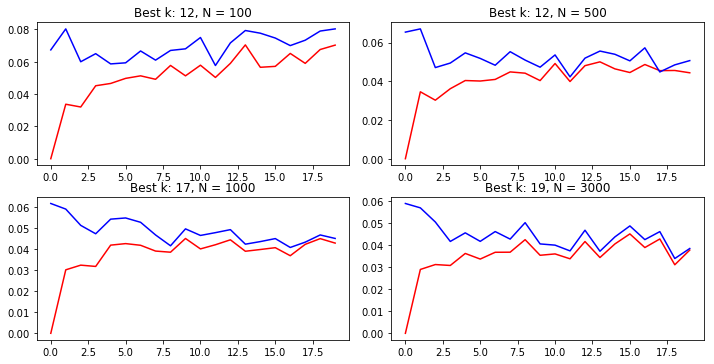

In [23]:
# Vaš kôd ovdje...
figure, axarr = plt.subplots(2, 2, figsize = (10, 5))
figure.tight_layout()
i = 0
j = 0
for N in [100, 500, 1000, 3000]:
    print "Trying with: ", N
    
    if(N == 100):
        i = j = 0
    elif(N == 500):
        i = 0
        j = 1
    elif(N == 1000):
        i = 1
        j = 0
    else:
        i = j = 1
        
    k, train_errors, test_errors = knn_eval(n_instances=N, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)
    
    plt.axes(axarr[i, j])
    axarr[i, j].set_title("Best k: " + str(k) +  ", N = " + str(N))
    plt.plot(range(len(train_errors)), train_errors, color = "red")
    plt.plot(range(len(test_errors)), test_errors, color = "blue")
    

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

In [24]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
# Vaš kôd ovdje...
X_c = deepcopy(X)
X_c[:,1] = X_c[:,1]*100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y, test_size=0.3)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

knn.fit(X_c_train, y_c_train)
predictions_c = knn.predict(X_c_test)

print "Unscaled accuracy: ", accuracy_score(y_test, predictions)
print "Scaled copy accuracy: ", accuracy_score(y_c_test, predictions_c)

Unscaled accuracy:  0.833333333333
Scaled copy accuracy:  0.683333333333


**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

Best k1:  7


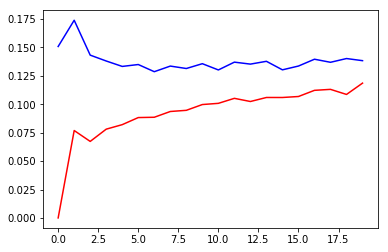

Best k2:  16


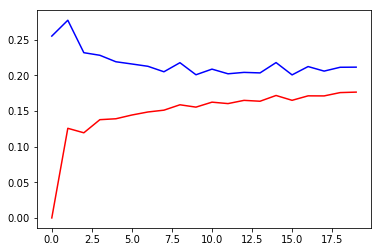

In [25]:
# Vaš kôd ovdje...
N = 1000
K = 5
k1, train_errors1, test_errors1 = knn_eval(n_instances=N, n_features=10, n_classes=K, n_informative=10)
print "Best k1: ", k1

plt.plot(range(len(train_errors1)), train_errors1, color = "red")
plt.plot(range(len(test_errors1)), test_errors1, color = "blue")
plt.show()

k2, train_errors2, test_errors2 = knn_eval(n_instances=N, n_features=10, n_classes=K, n_informative=5)
print "Best k2: ", k2
plt.plot(range(len(train_errors2)), train_errors2, color = "red")
plt.plot(range(len(test_errors2)), test_errors2, color = "blue")
plt.show()
    

**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?